Notebook for estimating curves using target real data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# custom libs
import sys
sys.path.append("..")
from src.libs.dynamicFPC import K_dFPC, W_dFPC
from src.libs.plotting import set_plotting_configs
from src.libs.transformations import obtain_densities, obtain_lqds, obtain_densities_from_lqd

set_plotting_configs()

In [10]:
# Dados
data_path = "../data/processed/"
returns_path = ''.join([data_path, 'ibovespa_treated.xlsx'])
df = pd.read_excel(returns_path, index_col="time")
df.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000011,-0.000372,-0.000035,0.007233,-0.001305,-0.000459,0.002388,0.002212,-0.008001,-0.000824,...,-0.000957,-0.002307,-0.003734,-0.005020,-0.001139,-0.000255,0.002339,0.004176,-0.000224,-0.000238
10:05:00,-0.002271,0.003372,0.001716,0.005538,0.000069,0.006429,0.002343,0.001918,-0.007582,-0.000413,...,-0.001522,0.000739,-0.000613,0.000306,-0.002021,-0.000810,0.001557,-0.001565,-0.000193,0.002906
10:10:00,-0.000582,0.002832,-0.000502,0.000739,0.000261,0.001891,0.000775,-0.001172,0.000216,-0.000432,...,0.000360,-0.000105,-0.000159,-0.000362,0.000092,0.001131,0.001170,0.000202,0.000556,0.000475
10:15:00,-0.001997,0.001091,0.000111,-0.000192,0.000407,-0.001392,-0.000477,-0.001526,0.000198,-0.001821,...,0.001121,-0.000284,0.003272,-0.001107,-0.001012,-0.000174,0.001002,0.001815,-0.000168,0.000973
10:20:00,-0.000037,-0.000505,-0.000327,-0.000580,-0.000436,-0.000405,0.001263,0.000676,-0.002667,0.001033,...,0.000449,0.000335,0.000853,0.000981,-0.000057,-0.000096,0.000832,0.001951,0.001060,-0.001004


In [15]:
M=3000
df_densities_supports, df_densities = obtain_densities(df, M=M)
df_densities.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,26.484908,26.956133,43.192058,125.280911,22.281346,38.967352,16.381520,14.790396,14.755901,68.336475,...,56.055614,22.715586,14.822458,15.843866,32.781883,18.742967,33.634914,25.011205,59.591366,35.178493
1,26.549913,26.973634,43.381074,126.228831,22.328213,39.236235,16.389919,14.873119,14.785411,68.447117,...,56.269242,22.760257,14.822055,15.843451,32.878703,18.745446,33.688952,25.117131,59.739446,35.313673
2,26.614794,26.990503,43.570813,127.181415,22.375076,39.506838,16.398066,14.956030,14.814484,68.557193,...,56.483268,22.804829,14.820845,15.842209,32.975476,18.747281,33.742663,25.223321,59.886899,35.448818
3,26.679553,27.006743,43.761277,128.138661,22.421938,39.779179,16.405963,15.039127,14.843118,68.666702,...,56.697690,22.849304,14.818828,15.840138,33.072200,18.748473,33.796047,25.329778,60.033721,35.583923
4,26.744189,27.022353,43.952468,129.100567,22.468800,40.053275,16.413611,15.122411,14.871311,68.775642,...,56.912509,22.893683,14.816005,15.837239,33.168874,18.749022,33.849104,25.436506,60.179908,35.718987


# Forward transformation

In [16]:
lqdSup, df_lqds, c = obtain_lqds(df_densities_supports, df_densities) 

df_lqds.head()

Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,-3.291162,-3.312394,-3.786379,-4.874534,-3.116237,-3.680875,-2.813958,-2.710720,-2.706796,-4.261699,...,-4.051187,-3.142843,-2.707978,-2.782172,-3.514932,-2.942690,-3.542755,-3.232546,-4.102072,-3.575104
1,-3.310255,-3.316082,-3.814810,-4.881368,-3.140384,-3.702151,-2.819715,-2.731040,-2.718934,-4.269305,...,-4.067698,-3.164606,-2.705502,-2.779735,-3.534229,-2.942163,-3.552304,-3.261041,-4.119707,-3.597743
2,-3.328377,-3.318838,-3.842364,-4.888140,-3.163541,-3.722958,-2.822779,-2.750731,-2.729608,-4.276613,...,-4.083808,-3.184983,-2.698051,-2.772392,-3.552744,-2.937229,-3.561328,-3.288471,-4.136204,-3.619353
3,-3.345617,-3.320690,-3.869089,-4.894851,-3.185944,-3.743319,-2.823575,-2.769824,-2.738876,-4.283633,...,-4.099535,-3.204145,-2.685456,-2.759995,-3.570518,-2.927901,-3.569855,-3.314953,-4.151642,-3.640009
4,-3.362051,-3.321665,-3.895031,-4.901503,-3.207803,-3.763260,-2.822574,-2.788360,-2.746783,-4.290372,...,-4.114894,-3.222246,-2.667462,-2.742286,-3.587599,-2.914162,-3.577909,-3.340589,-4.166091,-3.659781


In [31]:
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
nt=M
dimensions = 10

WdFPC_model = W_dFPC(df_lqds.values)
WdFPC_model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

WdFPC_fitted = WdFPC_model.Yhat

c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:613: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


In [32]:
m=nt
lag_maximum = 5
du=0.05
u = lqdSup

KdFPC_model = K_dFPC(df_lqds.values)
KdFPC_model.fit(
    lag_max=lag_maximum,
    alpha=0.10,
    du=0.05,
    B=1000,
    p=5,
    m=nt,
    u=u,
    select_ncomp=False,
    dimension=dimensions
)

KdFPC_fitted = KdFPC_model.fitted_values

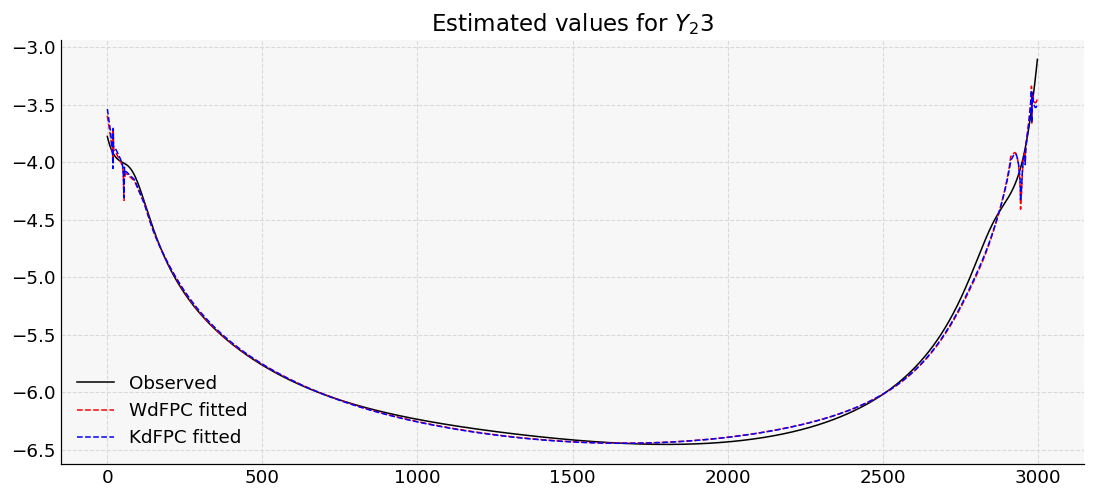

MSE WdFPC: 0.002608881589181626
MSE KdFPC: 0.0024779324132718577


In [33]:
t = 23

plt.figure()

plt.plot(df_lqds.iloc[:, t], label="Observed", c="black")
plt.plot(WdFPC_fitted[:, t], label="WdFPC fitted", c="red", linestyle="--")
plt.plot(KdFPC_fitted[:, t], label="KdFPC fitted", c="blue", linestyle="--")

plt.legend()
plt.title(f"Estimated values for $Y_{t}$")

plt.show()

print("MSE WdFPC:", mean_squared_error(df_lqds.iloc[:, t], WdFPC_fitted[:,t]))
print("MSE KdFPC:", mean_squared_error(df_lqds.iloc[:, t], KdFPC_fitted[:,t]))

In [34]:
avg_w_mse = []
avg_k_mse = []

for i in range(df_lqds.shape[1]):
    avg_w_mse.append(mean_squared_error(df_lqds.iloc[:, i], WdFPC_fitted[:,t]))
    avg_k_mse.append(mean_squared_error(df_lqds.iloc[:, i], KdFPC_fitted[:,t]))

print("Overall MSE WdFPC:", np.mean(avg_w_mse))
print("Overall MSE KdFPC:", np.mean(avg_k_mse))

Overall MSE WdFPC: 0.13915311747529982
Overall MSE KdFPC: 0.13895256527252128


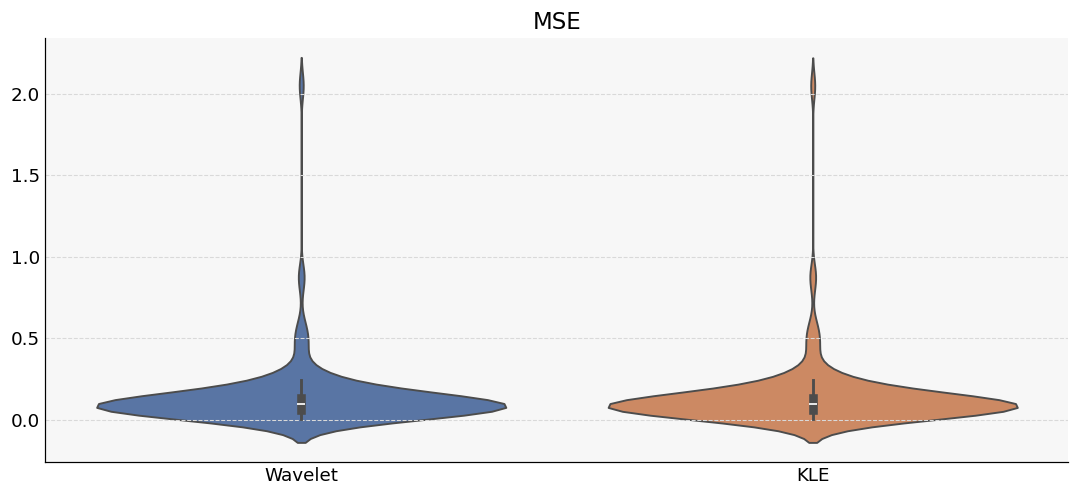

In [35]:
df_mse = pd.DataFrame({"Wavelet": avg_w_mse, "KLE": avg_k_mse})

sns.violinplot(df_mse).set_title(f"MSE")
plt.show()

# Backwards transformation

In [40]:
df_k_fitted = pd.DataFrame(KdFPC_fitted, columns=df.columns)
df_w_fitted = pd.DataFrame(WdFPC_fitted, columns=df.columns)

In [42]:
wvlt_bkw_supports, wvlt_bkw_densities = obtain_densities_from_lqd(
                                                            df_w_fitted,
                                                            lqdSup,
                                                            c
)

In [43]:
kle_bkw_supports, kle_bkw_densities = obtain_densities_from_lqd(
                                                            df_k_fitted,
                                                            lqdSup,
                                                            c
)

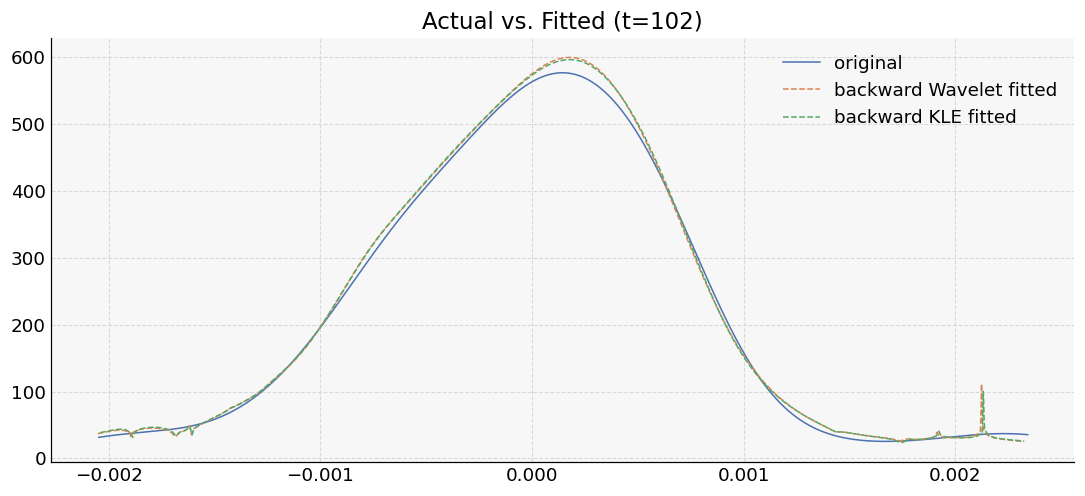

In [47]:
# Reconstrói curva a partir de estimação
t = 102

plt.figure()

plt.plot(df_densities_supports.iloc[:,t], df_densities.iloc[:,t], label="original")

plt.plot(wvlt_bkw_supports.iloc[:,t], wvlt_bkw_densities.iloc[:,t], label="backward Wavelet fitted", linestyle="--")
plt.plot(kle_bkw_supports.iloc[:,t], kle_bkw_densities.iloc[:,t], label="backward KLE fitted", linestyle="--")

plt.legend()
plt.title(f"Actual vs. Fitted (t={t})")

plt.show()